In [19]:
from PIL import Image  # Python Imaging Library
import numpy as np

In [20]:
inicjaly = Image.open("bs.bmp")  # wczytywanie obrazu

print("tryb", inicjaly.mode)
print("format", inicjaly.format)
print("rozmiar", inicjaly.size)

t_inicjaly = np.asarray(inicjaly)
print("typ danych tablicy", t_inicjaly.dtype)  # typ danych przechowywanych w tablicy
print("rozmiar tablicy", t_inicjaly.shape)  # rozmiar tablicy - warto porównac z wymiarami obrazka



tryb 1
format BMP
rozmiar (100, 50)
typ danych tablicy bool
rozmiar tablicy (50, 100)


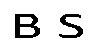

In [21]:
inicjaly
# inicjaly.show()

In [22]:
def rysuj_ramke_w_obrazie(obraz, grub):
    tab_obraz = np.asarray(obraz).astype(np.uint8)
    h, w = tab_obraz.shape
    for i in range(h):
        for j in range(grub):
            tab_obraz[i][j]=0 
        for j in range(w-grub,w):
            tab_obraz[i][j]=0   
        
    for i in range(grub):
        tab_obraz[i][:]=0
    for i in range(h-grub,h):
        tab_obraz[i][:]=0
        
    tab = tab_obraz.astype(bool) # zapisanie tablicy w typie bool (obrazy czarnobiałe)
    return Image.fromarray(tab)

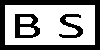

In [23]:
rysuj_ramke_w_obrazie(inicjaly, 10)

In [4]:
def rysuj_paski_w_obrazie(obraz, grub): # rysuje pionowy pas grubości grub po lewej stronie oraz po prawej stronie 
    tab_obraz = np.asarray(obraz).astype(np.uint8) # wczytanie tablicy obrazu i zamiana na int
    h, w = tab_obraz.shape
    for i in range(h):
        for j in range(grub):
            tab_obraz[i][j]=0 
        for j in range(w-grub,w):
            tab_obraz[i][j]=0   
    tab = tab_obraz.astype(bool) # zapisanie tablicy w typie bool (obrazy czarnobiałe)
    return Image.fromarray(tab)
    

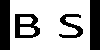

In [5]:
rysuj_paski_w_obrazie(inicjaly, 10)

In [24]:
def rysuj_ramke(w, h, grub): # grub grubość ramki w pikselach
    t = (h, w)  # rozmiar tablicy
    tab = np.ones(t, dtype=np.uint8)  # deklaracja tablicy wypełnionej zerami - czarna
    tab[grub:h - grub, grub:w - grub] = 0  # skrócona wersja ustawienia wartości dla prostokatnego fragmentu tablicy [zakresy wysokości, zakresy szerokości] tablicy
    tab1 = tab.astype(np.bool_)
    return Image.fromarray(tab1)

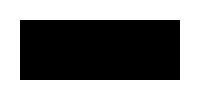

In [25]:
rysuj_ramke(200, 100, 20)

In [26]:
def rysuj_pasy_poziome(w, h, grub):  # w, h   -  rozmiar obrazu
    t = (h, w)  # rozmiar tablicy
    tab = np.ones(t, dtype=np.uint8)
    # jaki bedzie efekt, gdy np.ones zamienimy na np.zeros?
    ile =  int(h/grub)  # liczba pasów  o grubości grub
    for k in range(ile):  # uwaga k = 0,1,2..   bez ile
        for g in range(grub):
            i = k * grub + g  # i - indeks wiersza, j - indeks kolumny
            for j in range(w):
                tab[i, j] = k % 2  # reszta z dzielenia przez dwa
    tab = tab * 255  # alternatywny sposób uzyskania tablicy obrazu czarnobiałego ale w trybie odcieni szarości
    return Image.fromarray(tab)  # tworzy obraz


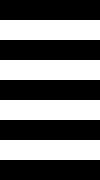

In [27]:
rysuj_pasy_poziome(100, 180, 20)

In [10]:
def wstaw_obraz(w, h, m, n, obraz): # w,h rozmiary nowego obrazu, m<=w,  n<=h (m,n miejsce wstawienia obrazu )
    tab_obraz = np.asarray(obraz).astype(np.int_)
    h0, w0 = tab_obraz.shape
    t = (h, w)  # rozmiar tablicy nowego obrazu
    tab = np.zeros(t, dtype=np.uint8)  # deklaracja tablicy wypełnionej zerami - czarna
    n_k = min(h, n + h0) # jesli wstawiany obraz wychodzi poza ramy nowego obrazu, to przycinamy
    m_k = min(w, m + w0) # jesli wstawiany obraz wychodzi poza ramy nowego obrazu, to przycinamy
    n_p = max(0, n) # jesli miejsce wstawienia jest ujemne(wychodzi poza nowy obraz w górę), to przycinamy
    m_p = max(0, m) # jesli miejsce wstawienia jest ujemne(wychodzi poza nowy obraz w lewo), to przycinamy
    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            tab[i][j] = tab_obraz[i - n][j - m]
    tab = tab.astype(bool) # zapisanie tablicy w typie bool (obrazy czarnobiałe)
    return Image.fromarray(tab)
    

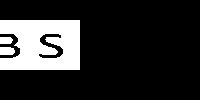

In [28]:
wstaw_obraz(200, 100, -20, 20, inicjaly)